# Covid-19 Vaccine Allocations and Case Counts Analysis
----

Written in the Python 3.7.9 Environment

By Tarak Patel, Nicole Lund and Anne Niemiec.

Common Jupyter cells have been notated for ease of merging after individuals their analysis.

Individual working files will be merged using https://pypi.org/project/nbmerge/

In [1]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load Dependencies

# Data Organization & Collection
import pandas as pd
import requests
import json
from census import Census

# Data Visualization & Analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps

# General Navigation
import time
import os
import sys

In [2]:
# Define users api key file folder location
api_key_path = r"C:\Users\nlund\Documents\GitHub\untracked_files"

In [3]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Add API key file to system path
# sys.path.append(api_key_path)

# # Import Census API Key
# from untracked_api_keys import census_key
# c = Census(census_key, year=2019)

# # Import Google API key
# from untracked_api_keys import g_key

In [4]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Case and Death Counts by state and time
    # This data combines:
        # United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
        # state_code.csv

c_d_withstate_df_path = r"..\data_manipulation\clean_data\c_d_withstate_df.csv"
cases_deaths_df = pd.read_csv(c_d_withstate_df_path)
cases_deaths_df.head()

,state_name,state_code,date,day_num,total_cases,confirmed_cases,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,consent_cases,consent_deaths,created_at
0,Alaska,AK,12/14/2020,0,40160,0.0,0.0,422,0.0,175,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
1,Alabama,AL,12/14/2020,0,297895,244762.0,53133.0,2264,332.0,4102,3624.0,478.0,0,0.0,Agree,Agree,12/15/2020 14:39
2,Arkansas,AR,12/14/2020,0,187057,0.0,0.0,1355,122.0,2990,0.0,0.0,45,22.0,Not agree,Not agree,12/15/2020 14:39
3,American Samoa,AS,12/14/2020,0,3,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
4,Arizona,AZ,12/14/2020,0,420248,404294.0,15954.0,11806,503.0,7358,6782.0,576.0,1,-2.0,Agree,Agree,12/15/2020 14:39


In [5]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Vaccination Allocation Data by state and time
    # This data combines:
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv

Combined_Vaccine_df_path = r"..\data_manipulation\clean_data\Combined_Vaccine_df.csv"
vaccine_allocation_df = pd.read_csv(Combined_Vaccine_df_path)
vaccine_allocation_df.head()

,state_name,state_code,date,day_num,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,Connecticut,CT,04/19/2021,126,54990,54990,40400.0,40400.0,0.0
1,Maine,ME,04/19/2021,126,21060,21060,15400.0,15400.0,0.0
2,Massachusetts,MA,04/19/2021,126,105300,105300,77700.0,77700.0,0.0
3,New Hampshire,NH,04/19/2021,126,21060,21060,15500.0,15500.0,0.0
4,Rhode Island,RI,04/19/2021,126,16380,16380,12100.0,12100.0,0.0


In [6]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for State Population from Census reports
    # This data collects census API request data by state:
        # Population.csv

Population_path = r"..\data_manipulation\clean_data\Population.csv"
census_df = pd.read_csv(Population_path)
census_df.head()

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


In [7]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Daily Vaccination Administered Data by state
     
Vaccine_admin_path = r"..\data_manipulation\clean_data\Vaccines_Administered_df.csv"
vaccine_admin_df = pd.read_csv(Vaccine_admin_path)
vaccine_admin_df.head()

,state_name,state_code,date,day_num,daily_vaccinations
0,Alabama,AL,2021-01-13,30,5906
1,Alabama,AL,2021-01-14,31,7083
2,Alabama,AL,2021-01-15,32,7478
3,Alabama,AL,2021-01-16,33,7498
4,Alabama,AL,2021-01-17,34,7509


# Group 1 Analysis

## Line Plot showing National Summarized Vaccine Allocations by Date 
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer + Moderna 1st dose allocation  
Line 2 - Pfizer + Moderna 2nd dose allocation  
Line 3 - J&J allocations  
Note: y-axis data is a summation for all states  
Legend labels = Pfizer + Moderna 1st dose, Pfizer + Moderna 2nd dose, J&J Single dose

In [8]:
vaccine_allocation_df['Month'] = pd.DatetimeIndex(vaccine_allocation_df['date']).month.astype(str)
vaccine_allocation_df['Year'] = pd.DatetimeIndex(vaccine_allocation_df['date']).year.astype(str)
vaccine_allocation_df['yr_mo'] = vaccine_allocation_df['Year'] + '-' + vaccine_allocation_df['Month']
vaccine_By_day = vaccine_allocation_df.groupby(['day_num', 'date', 'yr_mo']).sum().reset_index()
vaccine_By_day
# vaccine_allocation_df

,day_num,date,yr_mo,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,0,12/14/2020,2020-12,2980575,2943525,0.0,0.0,0.0
1,7,12/21/2020,2020-12,2071875,2071875,5990000.0,5948600.0,0.0
2,14,12/28/2020,2020-12,2643225,2643225,2047300.0,2047300.0,0.0
3,21,01/04/2021,2021-1,2131350,2092350,2104400.0,2064400.0,0.0
4,28,01/11/2021,2021-1,2084550,2084550,2047200.0,2047200.0,0.0
5,35,01/18/2021,2021-1,2149875,2149875,2150000.0,2150000.0,0.0
6,42,01/25/2021,2021-1,2149875,2149875,2150300.0,2150300.0,0.0
7,49,02/01/2021,2021-2,2204475,2165475,2915180.0,2881400.0,0.0
8,56,02/08/2021,2021-2,2149875,2149875,3430000.0,3430000.0,0.0
9,63,02/15/2021,2021-2,2149875,2149875,3350000.0,3350000.0,0.0


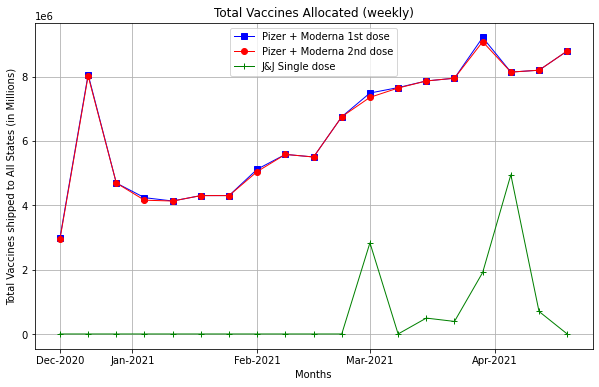

In [9]:
## Adding Dose 1 PFE and MRNA And Adding Dose2 PFE and MRNA
vaccine_By_day['Dose_1'] = vaccine_By_day['pfe_dose_1'] + vaccine_By_day['mrna_dose_1']
vaccine_By_day['Dose_2'] = vaccine_By_day['pfe_dose_2'] + vaccine_By_day['mrna_dose_2']

## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['Dose_1'], marker='s',color='b', linewidth=1, label='Pizer + Moderna 1st dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['Dose_2'], marker='o', color='red', linewidth=1, label='Pizer + Moderna 2nd dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['jnj_dose_1'], marker='+', color='green', linewidth=1, label='J&J Single dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel('Total Vaccines shipped to All States (in Millions)')
plt.title('Total Vaccines Allocated (weekly)')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

# vaccine_By_day.to_csv('vacation.csv')


## Line Plot showing National Vaccine Allocations by Date
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer 1st dose allocation  
Line 2 - Moderna 1st dose allocations  
Line 3 - Pfizer 2nd dose allocations  
Line 4 - Moderna 2nd dose allocations  
Line 5 - J&J allocations  
Note: y-axis data is a summation for all states  
Legend labels = Pfizer 1st dose, Moderna 1st dose, Pfizer 2nd dose, Moderna 2nd dose, J&J Single dose

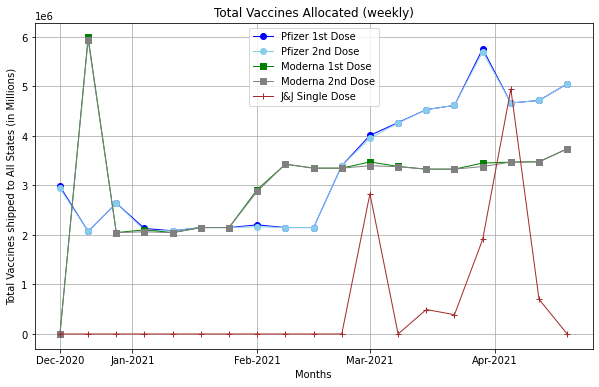

In [10]:
## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['pfe_dose_1'], marker='o',color='b', linewidth=1, label='Pfizer 1st Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel('Total Vaccines shipped to All States (in Millions)')
plt.title('Total Vaccines Allocated (weekly)')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Line Plot showing Individual State (Arizona) Vaccine Allocations by Date
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer 1st dose allocation  
Line 2 - Moderna 1st dose allocations  
Line 3 - Pfizer 2nd dose allocations  
Line 4 - Moderna 2nd dose allocations  
Line 5 - J&J allocations  
Legend labels = Pfizer 1st dose, Moderna 1st dose, Pfizer 2nd dose, Moderna 2nd dose, J&J Single dose

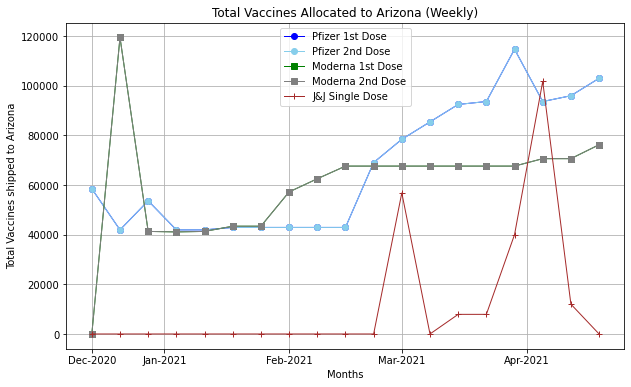

In [11]:
state_df = vaccine_allocation_df[vaccine_allocation_df['state_name'] == 'Arizona'].sort_values(by='day_num').reset_index()
state_df

## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(state_df['day_num'], state_df['pfe_dose_1'], marker='o',color='b', linewidth=1, label='Pfizer 1st Dose')
plt.plot(state_df['day_num'], state_df['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
plt.plot(state_df['day_num'], state_df['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel('Total Vaccines shipped to Arizona')
plt.title('Total Vaccines Allocated to Arizona (Weekly)')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Bonus Line Plot showing Individual State (User Choice) Vaccine Allocations by Date
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer 1st dose allocation  
Line 2 - Moderna 1st dose allocations  
Line 3 - Pfizer 2nd dose allocations  
Line 4 - Moderna 2nd dose allocations  
Line 5 - J&J allocations  
Legend labels = Pfizer 1st dose, Moderna 1st dose, Pfizer 2nd dose, Moderna 2nd dose, J&J Single dose

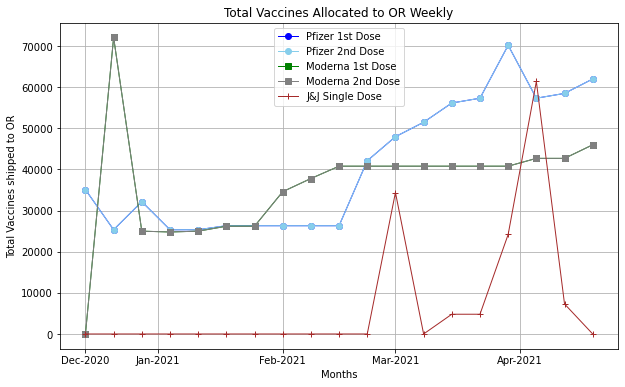

In [12]:
userchoice = input('Select State Code or State name')

state_df = vaccine_allocation_df[(vaccine_allocation_df['state_code'] == userchoice) | (vaccine_allocation_df['state_name'] == userchoice)].sort_values(by='day_num').reset_index()
state_df

## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(state_df['day_num'], state_df['pfe_dose_1'], marker='o',color='b', linewidth=1, label='Pfizer 1st Dose')
plt.plot(state_df['day_num'], state_df['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
plt.plot(state_df['day_num'], state_df['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel(f'Total Vaccines shipped to {userchoice}')
plt.title(f'Total Vaccines Allocated to {userchoice} Weekly')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Chart showing the Total Dose Allocated Vs Total Dose Administered by State   
x-axis = State  
y-axis =   
1. Total Vaccines Allocated   
2. Total Vaccine Administered  


In [13]:

#Sum Daily Vaccine adminstered by state
vaccine_admin_state_df = vaccine_admin_df.groupby(['state_code']).sum().reset_index()

## Sum Vaccine Allocated by State
vaaccine_alloc_state_df = vaccine_allocation_df.groupby(['state_code']).sum().reset_index()
vaaccine_alloc_state_df

## Merge Vaccine Allocated and Daily Vaccine Administered DF
merge_vac_all_admin_df = pd.merge(vaccine_admin_state_df, vaaccine_alloc_state_df, on='state_code', how='inner')
merge_vac_all_admin_df

## Merge above DF with Census data ## The reason I used this df is to keep the number of record consistant across the different columns. 
merge_alloc_admin_census_df = pd.merge(merge_vac_all_admin_df, census_df, on='state_code', how='inner')
merge_alloc_admin_census_df.head()

# merge_alloc_admin_census_df


# # merge_df.to_csv('merge_df.csv')

,state_code,day_num_x,daily_vaccinations,day_num_y,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1,state_name,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,AK,7950,492655,1197,234780,223080,186500.0,186500.0,35500.0,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
1,AL,7950,2256790,1197,901680,901680,804400.0,804400.0,159900.0,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
2,AR,7950,1676987,1197,551460,551460,487900.0,487900.0,97100.0,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
3,AZ,7950,4445687,1197,1278420,1278420,1140200.0,1140200.0,226300.0,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
4,CA,7950,25749386,1197,7152600,7152600,6416000.0,6416000.0,1273000.0,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


In [14]:

# #Sum the columns. Rember to use population1 column for pupulateion because you don't want to sum bhe Population column 
merge_alloc_admin_census_df['Total Allocated'] = merge_alloc_admin_census_df['pfe_dose_1'] + merge_alloc_admin_census_df['pfe_dose_2'] + merge_alloc_admin_census_df['mrna_dose_1'] + merge_alloc_admin_census_df['mrna_dose_2'] + merge_alloc_admin_census_df['jnj_dose_1']
merge_alloc_admin_census_df.head()




,state_code,day_num_x,daily_vaccinations,day_num_y,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1,state_name,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate,Total Allocated
0,AK,7950,492655,1197,234780,223080,186500.0,186500.0,35500.0,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114,866360.0
1,AL,7950,2256790,1197,901680,901680,804400.0,804400.0,159900.0,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946,3572060.0
2,AR,7950,1676987,1197,551460,551460,487900.0,487900.0,97100.0,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860,2175820.0
3,AZ,7950,4445687,1197,1278420,1278420,1140200.0,1140200.0,226300.0,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676,5063540.0
4,CA,7950,25749386,1197,7152600,7152600,6416000.0,6416000.0,1273000.0,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765,28410200.0


<function matplotlib.pyplot.show(close=None, block=None)>

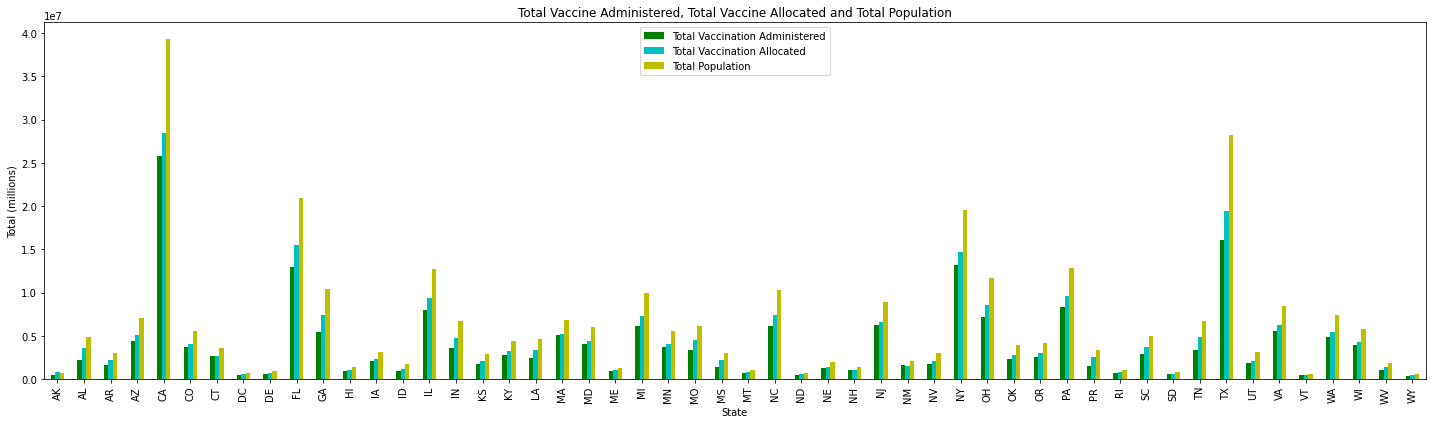

In [21]:
## Plot Line Chart

## Plot Figure

df_for_chart = merge_alloc_admin_census_df[['state_code',  'daily_vaccinations', 'Total Allocated',  'population']]
df_for_chart1 = df_for_chart.set_index('state_code')
df_chart_total = df_for_chart1.plot(kind='bar', figsize=(20,6), color={'daily_vaccinations': 'g', 'Total Allocated': 'c', 'population': 'y'},stacked=False)


## Change Labels
df_chart_total.set_xlabel('State')
df_chart_total.set_ylabel('Total (millions)')
df_chart_total.set_title('Total Vaccine Administered, Total Vaccine Allocated and Total Population')
df_chart_total.legend(['Total Vaccination Administered', 'Total Vaccination Allocated', 'Total Population'], loc = 'upper center')

plt.tight_layout()


# plt.grid()
plt.show

## Chart showing the % of Total Allocate Vaccines by CDS Vs % of Dose Administered by State (% calculated by dividing the Total Allocated and daily Vaccines by Each States Total Population)  
x-axis = State  
y-axis =   
1. Total Vaccines Allocated   
2. Total Vaccine Administered  

The data for Vaccine Adminstered not separated by state between 12/14/2020 to 1/13/2021

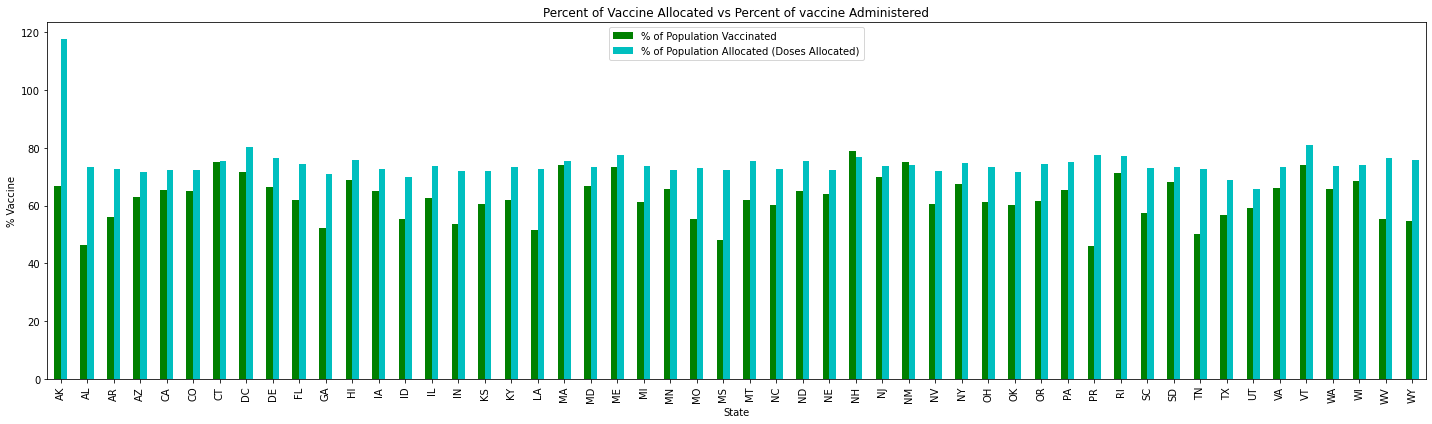

In [16]:
## States need to increase there vaccination rate

merge_alloc_admin_census_df['per_allocate'] = merge_alloc_admin_census_df['Total Allocated'] / merge_alloc_admin_census_df['population'] * 100
merge_alloc_admin_census_df['per_vaccinated'] = merge_alloc_admin_census_df['daily_vaccinations'] / merge_alloc_admin_census_df['population'] * 100
merge_alloc_admin_census_df.head()

### Create Dataframe
df_for_chart_per = merge_alloc_admin_census_df[['state_code', 'per_vaccinated', 'per_allocate']]

## Plot Graph
df_for_chart_per1 = df_for_chart_per.set_index('state_code')
df_chart_per = df_for_chart_per1.plot(kind='bar', figsize=(20,6), color={'per_vaccinated': 'g', 'per_allocate': 'c'}, stacked=False)


## Set Labels
df_chart_per.set_xlabel('State')
df_chart_per.set_ylabel('% Vaccine')
df_chart_per.set_title('Percent of Vaccine Allocated vs Percent of vaccine Administered')
df_chart_per.legend(['% of Population Vaccinated', '% of Population Allocated (Doses Allocated)'], loc='upper center')

## Show Graph
plt.tight_layout()
plt.show()

In [20]:
total_pop_vac = merge_alloc_admin_census_df[['daily_vaccinations', 'Total Allocated',  'population']]
total_sum_pop_vac = total_pop_vac.sum()
print(total_sum_pop_vac)

per_pop_vac = total_sum_pop_vac['daily_vaccinations'] / total_sum_pop_vac['population'] * 100
print(f'{round(per_pop_vac, 4)}% of population has received atleast one dose')


daily_vaccinations    203708004.0
Total Allocated       239699150.0
population            328016242.0
dtype: float64
62.103% of population has received atleast one dose
